## Importing important libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data collection and Preprocessing 

### Loading dataset 

In [2]:
s_data = pd.read_csv("advertising.csv")
s_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
#printing the first five rows of the dataset
s_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#printing the last five rows of the dataset
s_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
#getting information about our data
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#number of rows and columns in data
s_data.shape

(200, 4)

In [7]:
#checking missing values in each column
s_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
#getting statistical data
s_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
#checking the duplicates method 1
s_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [10]:
#checking the duplicates method 2
dup = s_data.duplicated()
print(s_data[dup])

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


## Data Visualization 

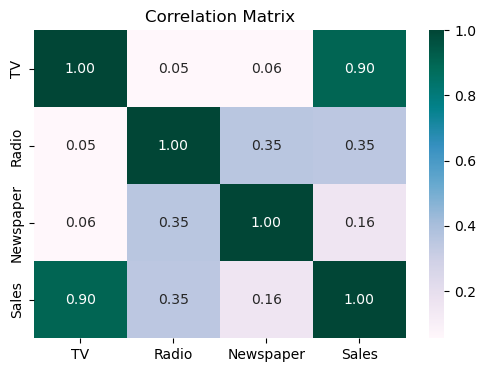

In [11]:
corr = s_data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='PuBuGn', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

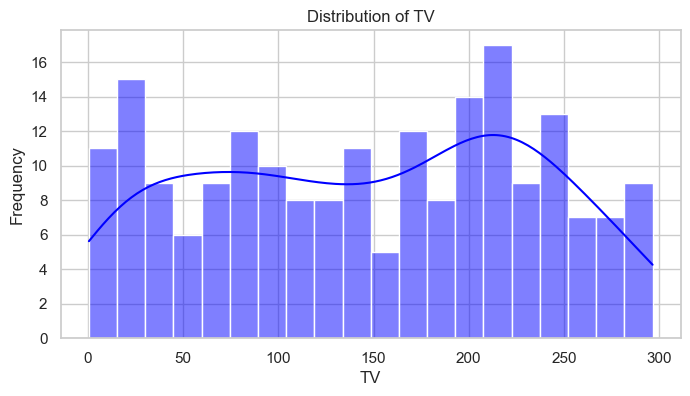

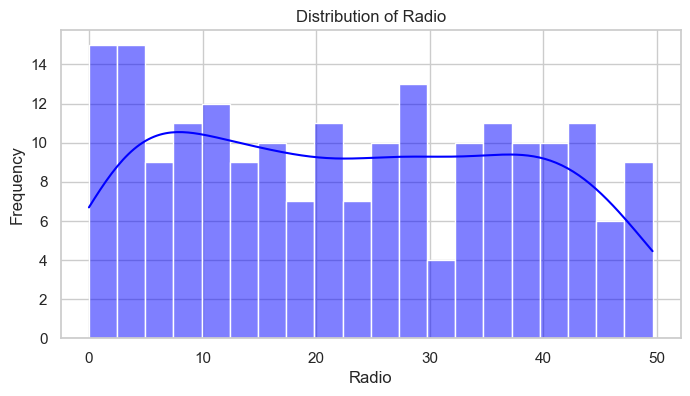

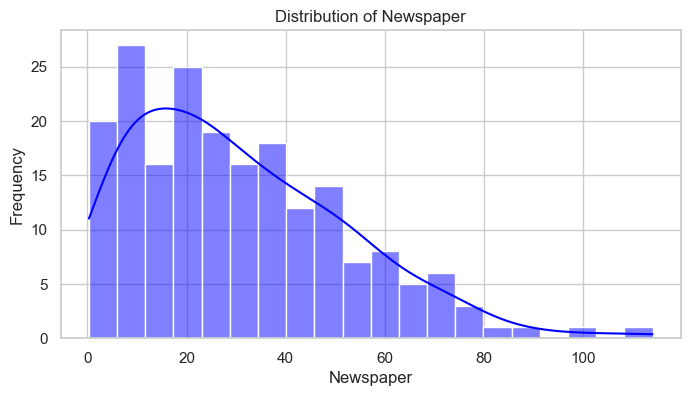

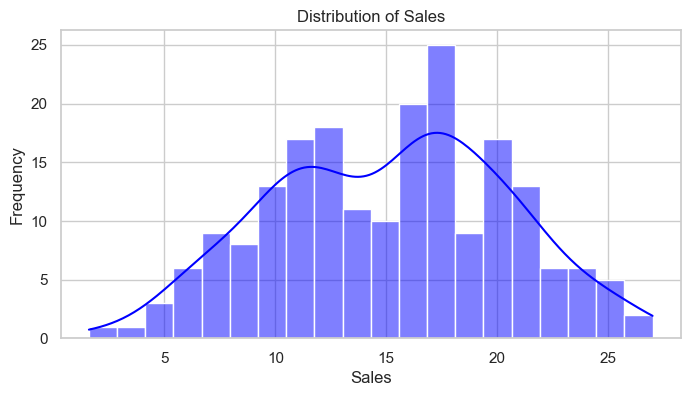

In [12]:
#creating histogram graph for 'TV' , 'Radio' , 'Newspaper' , 'Sales' columns

# Set the style for Seaborn plots
sns.set(style="whitegrid")
features = ['TV', 'Radio', 'Newspaper', 'Sales']
# Create subplots for each feature
for feature in features:
    plt.figure(figsize=(8, 4)) 
    plt.title(f'Distribution of {feature}')
    
    # Use a histogram to visualize the distribution
    sns.histplot(s_data[feature], kde=True, bins=20, color='blue')
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

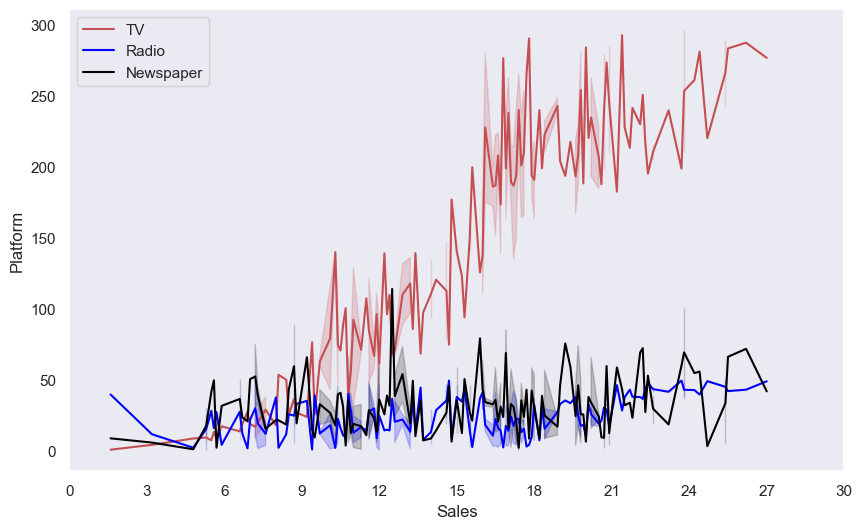

In [13]:
plt.figure(figsize=(10,6))
sns.set()
sns.lineplot(x='Sales', y='TV', data = s_data , color='r', label='TV')
sns.lineplot(x='Sales', y='Radio', data = s_data, color='blue', label='Radio')
sns.lineplot(x='Sales', y='Newspaper', data=s_data ,color='black', label='Newspaper')
plt.xlabel('Sales')
plt.xticks(np.arange(0,33,3))
plt.ylabel('Platform')

plt.grid()
plt.show()

# Data Modeling 

In [14]:
#importing train test split and logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

In [15]:
X = s_data.drop(columns = ['Sales'])
Y = s_data['Sales']
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.20)

In [16]:
print(Y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
prediction = model.predict(x_test)
prediction

array([ 9.38620881, 15.79906389, 13.04099244, 14.30736529,  8.90308187,
       16.97660671, 16.74197495, 12.84841348, 19.08518163,  5.43384793,
        6.18774557, 13.31858087, 14.61663845,  9.2184691 , 17.93448418,
        7.82705828, 20.17391711, 16.37095595, 16.16851688, 13.67967382,
        8.15881357, 23.41355516, 10.71168592, 22.75883895, 18.4803852 ,
       17.9890113 , 12.17997821, 16.63175783,  7.18015192, 24.33893326,
       13.26863845, 15.52256723, 16.74538048, 16.25782998, 16.50051183,
        6.14150792, 17.63320093, 21.76839807, 12.38559955, 20.94289299])

In [20]:
model.intercept_

4.7601622123795

In [21]:
model.coef_

array([0.05285116, 0.10365132, 0.00149795])

In [22]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  89.84490947082008
